# Data

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
from cdt.data import load_dataset

sachs, sachs_ground_truth = load_dataset('sachs')
sachs

,praf,pmek,plcg,PIP2,PIP3,p44/42,pakts473,PKA,PKC,P38,pjnk
0,26.4,13.20,8.82,18.30,58.80,6.61,17.0,414.0,17.00,44.90,40.00
1,35.9,16.50,12.30,16.80,8.13,18.60,32.5,352.0,3.37,16.50,61.50
2,59.4,44.10,14.60,10.20,13.00,14.90,32.5,403.0,11.40,31.90,19.50
3,73.0,82.80,23.10,13.50,1.29,5.83,11.8,528.0,13.70,28.60,23.10
4,33.7,19.80,5.19,9.73,24.80,21.10,46.1,305.0,4.66,25.70,81.30
...,...,...,...,...,...,...,...,...,...,...,...
7461,49.1,12.40,32.80,27.90,22.70,11.70,38.2,1144.0,1.00,2.55,1.00
7462,23.3,4.61,17.80,22.10,14.90,48.70,67.3,922.0,1.00,9.82,1.00
7463,28.1,4.49,18.80,20.20,10.20,3.08,21.9,730.0,1.00,1.75,2.00
7464,34.6,7.10,5.73,20.70,15.10,32.20,41.4,813.0,44.50,1382.00,2.44


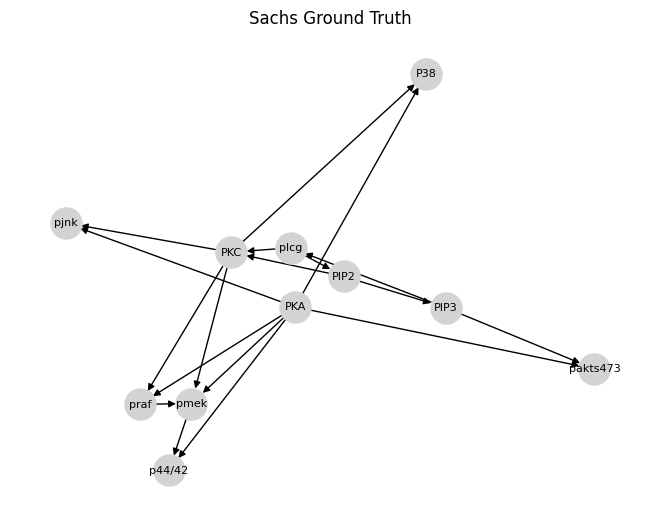

In [4]:
import networkx as nx 
import matplotlib.pyplot as plt

nx.draw(sachs_ground_truth, with_labels=True, node_size=500, font_size=8, node_color='lightgray')
plt.title('Sachs Ground Truth')
plt.show()

In [5]:
from causal_nest.problem import MissingDataHandlingMethod, Problem, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in sachs.drop('plcg', axis=1).columns]

dataset = Dataset(data=sachs, target='plcg', feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
problem = Problem(dataset=dataset, description='Sachs')

# Feature Sorting

In [6]:
dataset.feature_mapping

[FeatureTypeMap(feature='PIP2', type=<FeatureType.CONTINUOUS: 3>, importance=0.8084716307745493),
 FeatureTypeMap(feature='PKA', type=<FeatureType.CONTINUOUS: 3>, importance=0.10842405233492018),
 FeatureTypeMap(feature='PIP3', type=<FeatureType.CONTINUOUS: 3>, importance=0.060343829000128114),
 FeatureTypeMap(feature='P38', type=<FeatureType.CONTINUOUS: 3>, importance=0.005336703135420592),
 FeatureTypeMap(feature='PKC', type=<FeatureType.CONTINUOUS: 3>, importance=0.005046501463750412),
 FeatureTypeMap(feature='pjnk', type=<FeatureType.CONTINUOUS: 3>, importance=0.00464468637086554),
 FeatureTypeMap(feature='pakts473', type=<FeatureType.CONTINUOUS: 3>, importance=0.0031388638214776624),
 FeatureTypeMap(feature='p44/42', type=<FeatureType.CONTINUOUS: 3>, importance=0.0019814062771068893),
 FeatureTypeMap(feature='pmek', type=<FeatureType.CONTINUOUS: 3>, importance=0.001397326892991973),
 FeatureTypeMap(feature='praf', type=<FeatureType.CONTINUOUS: 3>, importance=0.0012149999287893458)

# Causal Discovery

In [6]:
from causal_nest.discovery import applyable_models

models = applyable_models(dataset)
models

[causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.cgnn.CGNN,
 causal_nest.discovery_models.fast_iamb.FAST_IAMB,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.inter_iamb.INTER_IAMB,
 causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.sam.SAM]

In [7]:
from causal_nest.discovery import discover_with_all_models

real_results = discover_with_all_models(dataset)
real_results

  0%|          | 0/4000 [00:00<?, ?it/s]

Function raised R Package sparsebn is not available.
Traceback (most recent call last):
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/pebble/common.py", line 174, in process_execute
    return function(*args, **kwargs)
  File "/app/causal_nest/discovery.py", line 113, in _run_discover_with_model_task
    return discover_with_model(*args)
  File "/app/causal_nest/discovery.py", line 83, in discover_with_model
    output_graph = m.create_graph_from_data(dataset)
  File "/app/causal_nest/discovery_models/ccdr.py", line 19, in create_graph_from_data
    m = CDT_CCDR()
  File "/root/.cache/pypoetry/virtualenvs/causal-nest-9TtSrW0h-py3.9/lib/python3.9/site-packages/cdt/causality/graph/CCDr.py", line 90, in __init__
    raise ImportError("R Package sparsebn is not available.")
ImportError: R Package sparsebn is not available.



  1%|          | 23/4000 [01:26<4:05:34,  3.70s/it, disc=0.0201, gen=-.909, regul_loss=0.139, tot=-9.86]

{'CCDR': None,
 'CGNN': None,
 'FAST_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca72820>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=21.17610197099566, priority_score=1.0101010101010102),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca72a00>, model='GS', auc_pr=None, shd=None, sid=None, runtime=25.843735097994795, priority_score=1.0101010101010102),
 'IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca724f0>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=14.11762607099081, priority_score=0.4297520661157026),
 'INTER_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca725b0>, model='INTER_IAMB', auc_pr=None, shd=None, sid=None, runtime=14.302316736997454, priority_score=0.4297520661157026),
 'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca722b0>, model='PC', auc_p

In [8]:
real_results

{'CCDR': None,
 'CGNN': None,
 'FAST_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6dd30>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=21.49551784600044, priority_score=1.1818181818181819),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6deb0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=26.233599113998935, priority_score=1.1818181818181819),
 'IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d940>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=14.165001493995078, priority_score=1.7508417508417504),
 'INTER_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6da90>, model='INTER_IAMB', auc_pr=None, shd=None, sid=None, runtime=14.494357160001528, priority_score=1.7508417508417504),
 'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d790>, model='PC', auc_

# Sorting results by potential and feature importance

In [9]:
sorted_results = list(sorted(filter(lambda x: x, real_results.values()), key=lambda x: x.priority_score, reverse=True))
sorted_results

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d940>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=14.165001493995078, priority_score=1.7508417508417504),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6da90>, model='INTER_IAMB', auc_pr=None, shd=None, sid=None, runtime=14.494357160001528, priority_score=1.7508417508417504),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d790>, model='PC', auc_pr=None, shd=None, sid=None, runtime=6.809327326998755, priority_score=1.6192225283134372),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6dd30>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=21.49551784600044, priority_score=1.1818181818181819),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6deb0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=26.233599113998935, priority_score=1.1818

In [11]:
real_results

{'CCDR': None,
 'CGNN': None,
 'FAST_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6dd30>, model='FAST_IAMB', auc_pr=None, shd=None, sid=None, runtime=21.49551784600044, priority_score=1.1818181818181819),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6deb0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=26.233599113998935, priority_score=1.1818181818181819),
 'IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d940>, model='IAMB', auc_pr=None, shd=None, sid=None, runtime=14.165001493995078, priority_score=1.7508417508417504),
 'INTER_IAMB': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6da90>, model='INTER_IAMB', auc_pr=None, shd=None, sid=None, runtime=14.494357160001528, priority_score=1.7508417508417504),
 'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fff1ca6d790>, model='PC', auc_

# Estimating

In [12]:
from causal_nest.estimation import estimate_all_effects

est_results = estimate_all_effects(dataset, real_results, verbose=True)
est_results

{'IAMB': [EstimationResult(model='IAMB', treatment='PIP2', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff21c40430>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff21bcf520>, control_value=0, treatment_value=1, p_value=array([0.])),
  EstimationResult(model='IAMB', treatment='PKA', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff21bd56d0>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff21bd5e20>, control_value=0, treatment_value=1, p_value=array([2.67408864e-42])),
  EstimationResult(model='IAMB', treatment='PIP3', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff21bded30>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff21bded90>, control_value=0, treatment_value=1, p_value=None),
  EstimationResult(model='IAMB', treatment='pjnk', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x

# Refuting

In [20]:
from causal_nest.refutation import refute_all_results

ref_results = refute_all_results(dataset, est_results, max_seconds_global=300, max_seconds_model=120)
ref_results

{'IAMB': [RefutationResult(treatment='p44/42', estimated_effect=0.5520112469384273, p_value=0.48, new_effect=0.2818190457413782, model='PlaceboPermute', runtime=37.93310441599897, passed=True),
  RefutationResult(treatment='p44/42', estimated_effect=0.5520112469384273, p_value=0.96, new_effect=0.5520620368266907, model='RandomCommonCause', runtime=43.8539429290031, passed=True),
  RefutationResult(treatment='p44/42', estimated_effect=0.5520112469384273, p_value=0.5800000000000001, new_effect=0.5506716036655286, model='SubsetRemoval', runtime=34.989676987002895, passed=True),
  RefutationResult(treatment='PIP2', estimated_effect=0.2897772928356792, p_value=0.45999999999999996, new_effect=0.009936410385947881, model='PlaceboPermute', runtime=45.44708563599852, passed=True),
  RefutationResult(treatment='PIP2', estimated_effect=0.2897772928356792, p_value=1.0, new_effect=0.2897778343549625, model='RandomCommonCause', runtime=52.42896397699951, passed=True),
  RefutationResult(treatment='P

# Visualizing

In [21]:
from causal_nest.result import generate_result_graph


graphs = {}
for r in real_results.values():
    if (r is None):
        continue

    graph = generate_result_graph(r, est_results, ref_results, dataset.target)
    graphs[r.model] = graph

graphs

-0.7065812369058335 3 1.0
0.0314009814704761 3 1.0
0.2897772928357707 3 1.0
-0.31301755556899735 3 1.0
0.5500207436580986 3 1.0
-0.16728902405059642 3 1.0
-0.024790733778218055 3 1.0
0.04138933823247726 3 1.0
0.12528505075556495 3 1.0
-0.16491920276802574 3 1.0
-0.7065812369058335 3 1.0
0.0314009814704761 3 1.0
0.2897772928357707 3 1.0
-0.31301755556899735 3 1.0
0.5500207436580986 3 1.0
-0.16728902405059642 3 1.0
-0.024790733778218055 3 1.0
0.04138933823247726 3 1.0
0.12528505075556495 3 1.0
-0.16491920276802574 3 1.0
-0.04716070020066354 3 1.0
0.22366381432107119 3 1.0
0.2897772928356792 3 1.0
0 0 0
0.5520112469384273 3 1.0
-0.07986038127543083 3 1.0
-0.02966334082167066 3 1.0
-0.11052794929301513 3 1.0
0.12459603947532827 3 1.0
-0.11762701601691816 3 1.0
-0.04716070020066354 3 1.0
0.22366381432107119 3 1.0
0.2897772928356792 3 1.0
0 0 0
0.5520112469384273 3 1.0
-0.07986038127543083 3 1.0
-0.02966334082167066 3 1.0
-0.11052794929301513 3 1.0
0.12459603947532827 3 1.0
-0.11762701601691

{'FAST_IAMB': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "praf"[width=1.7065812369058335, height=1.7065812369058335, label="praf\n-0.71", fillcolor="lightpink"];\n   "pmek"[width=1.031400981470476, height=1.031400981470476, label="pmek\n0.03", fillcolor="#4CAF50", fontcolor="white"];\n   "plcg"[width=1, height=1, label="plcg", fillcolor="magenta", color="purple", shape="hexagon", fontcolor="white"];\n   "PIP2"[width=1.2897772928357707, height=1.2897772928357707, label="PIP2\n0.29", fillcolor="#4CAF50", fontcolor="white"];\n   "PIP3"[width=1.3130175555689974, height=1.3130175555689974, label="PIP3\n-0.31", fillcolor="lightpink"];\n   "p44/42"[width=1.5500207436580986, height=1.5500207436580986, label="p44/42\n0.55", fillcolor="#4CAF50", fontcolor="white"];\n   "pakts473"[width=1.1672890240505

FAST_IAMB


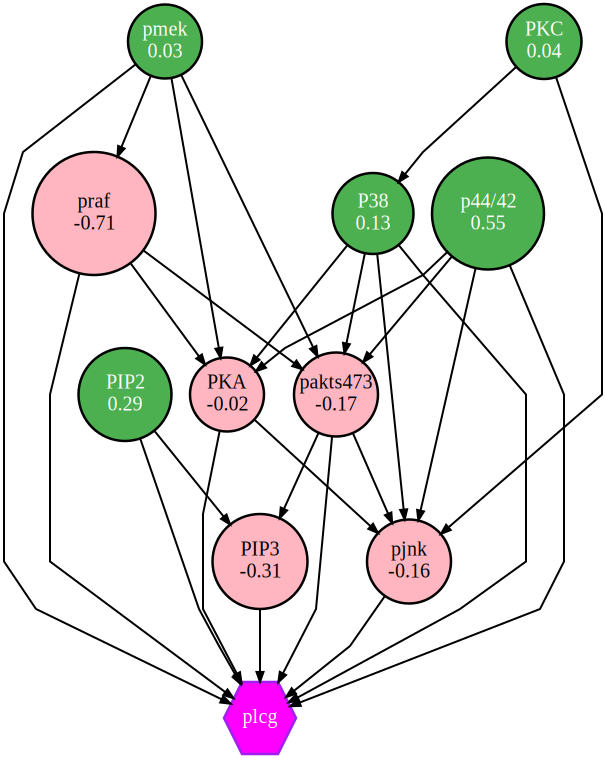

In [22]:
import pydot
from graphviz import Source

print('FAST_IAMB')
graphviz_source = Source(graphs['FAST_IAMB'])
graphviz_source.render(format='png')
graphviz_source

GS


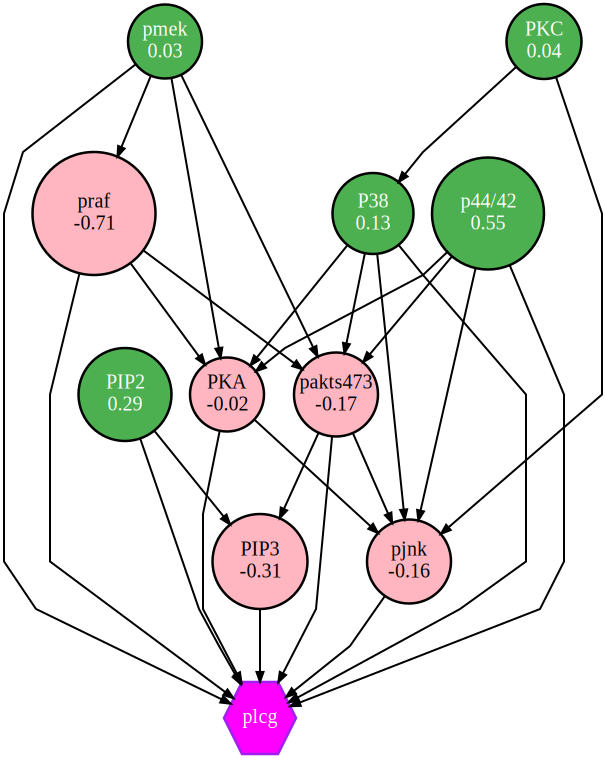

In [23]:
print('GS')
graphviz_source = Source(graphs['GS'])
graphviz_source.render(format='png')
graphviz_source

IAMB


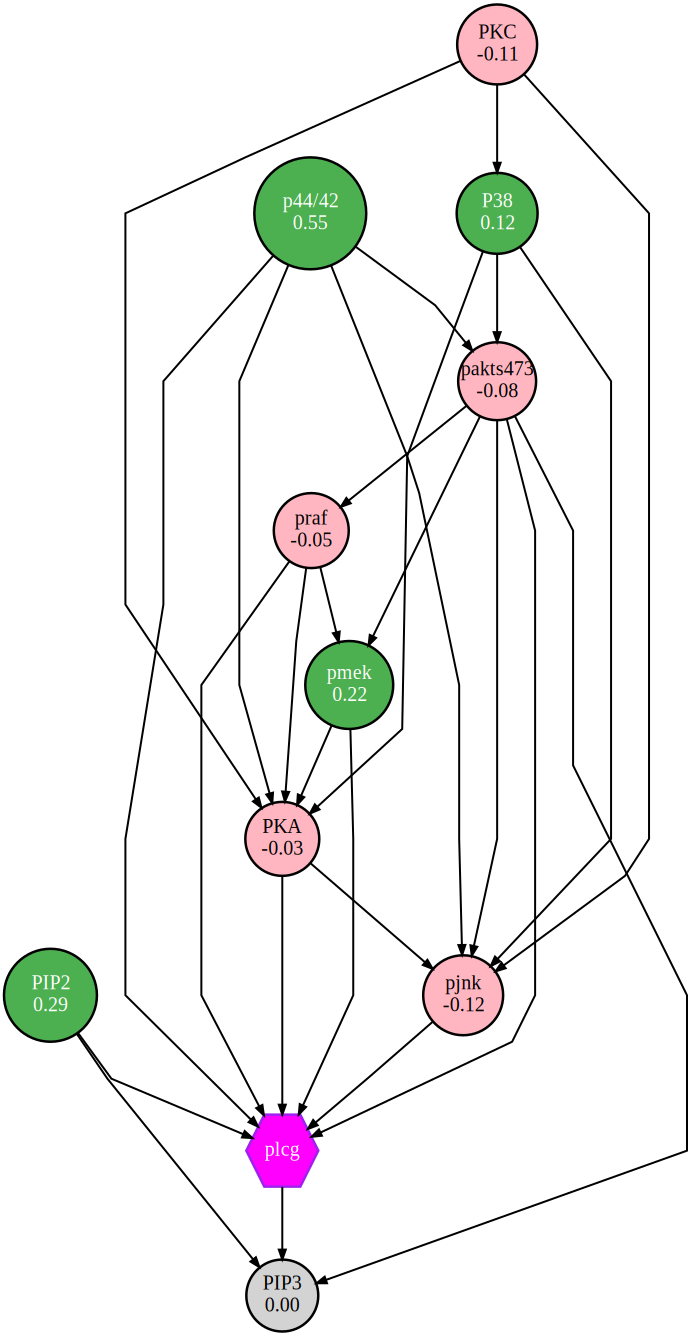

In [24]:
print('IAMB')
graphviz_source = Source(graphs['IAMB'])
graphviz_source.render(format='png')
graphviz_source

INTER_IAMB


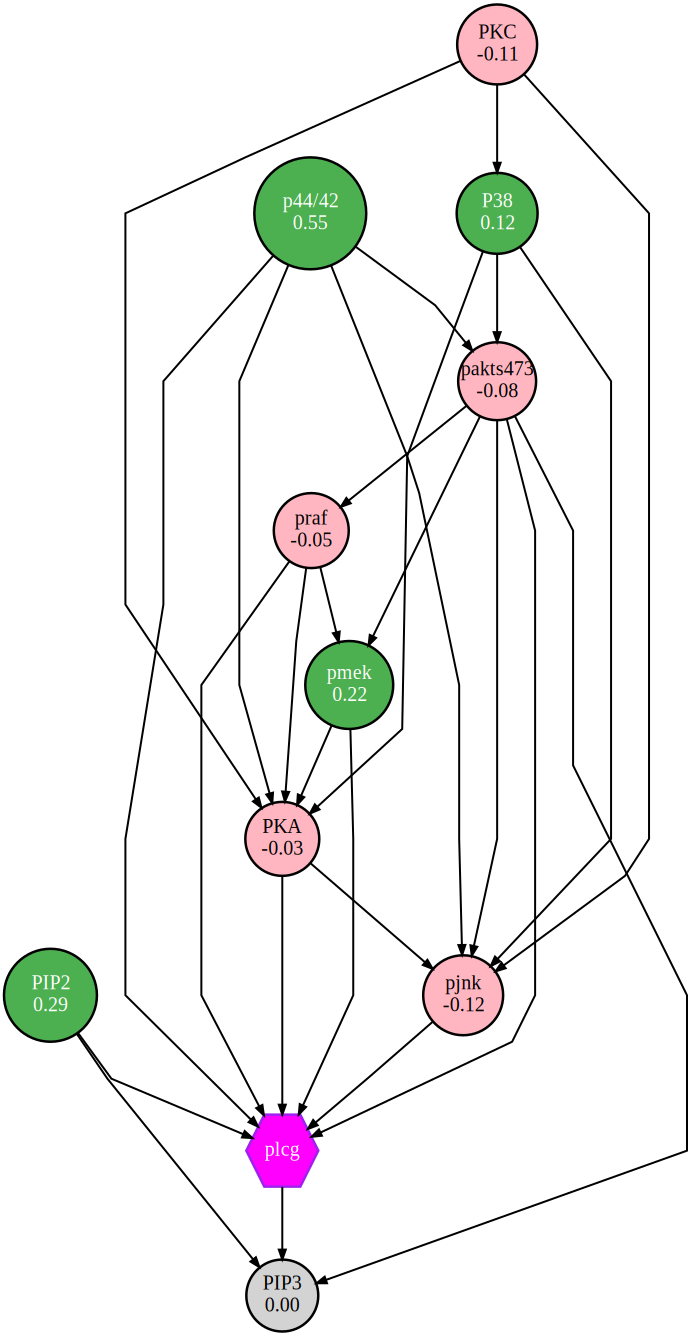

In [25]:
print('INTER_IAMB')
graphviz_source = Source(graphs['INTER_IAMB'])
graphviz_source.render(format='png')
graphviz_source

PC


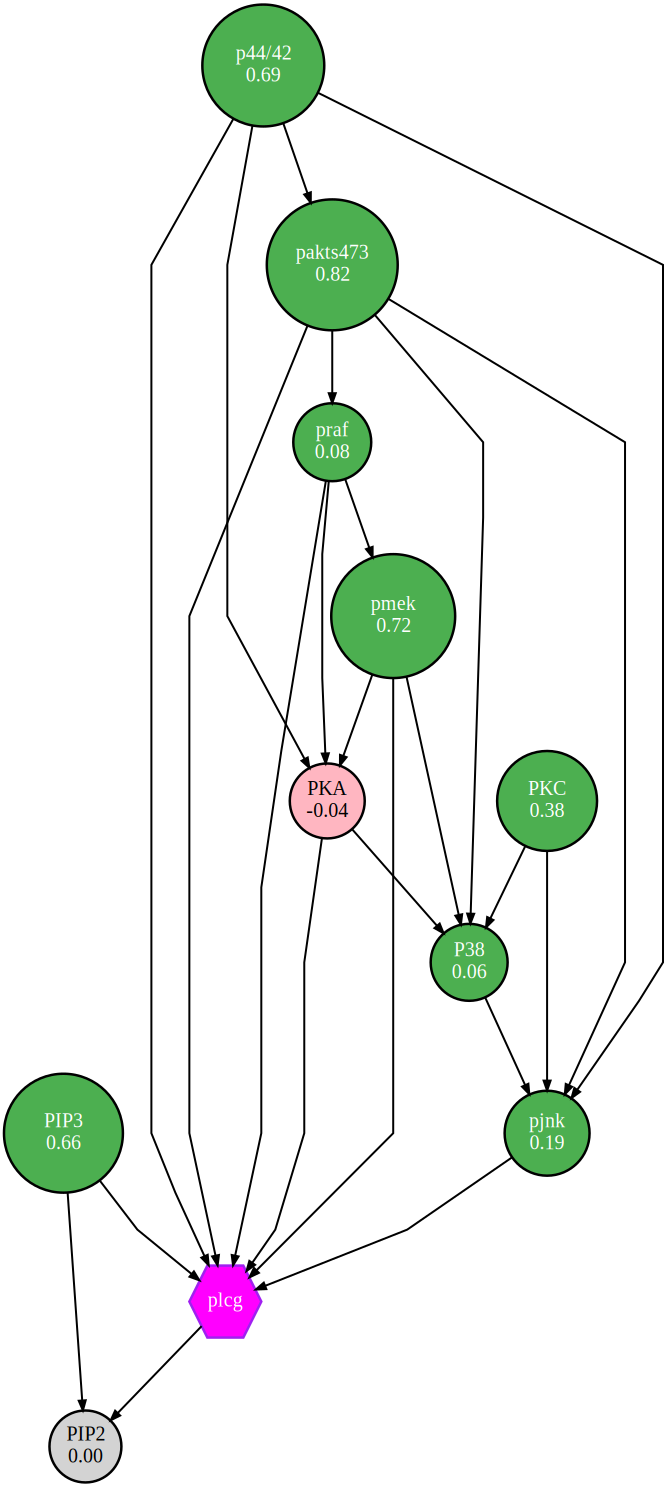

In [26]:
print('PC')
graphviz_source = Source(graphs['PC'])
graphviz_source.render(format='png')
graphviz_source

# Knowledge

In [1]:
from causal_nest.knowledge import parse_knowledge_file

parse_knowledge_file('./resources/example_knowledge.txt')

Knowledge(required_edges=[('a', 'b'), ('x', 'b')], forbidden_edges=[('r', 'y'), ('y', 'z'), ('x', 'z'), ('z', 'y'), ('x', 'y'), ('w', 'x'), ('w', 'z'), ('r', 'x'), ('w', 'y'), ('r', 'z'), ('y', 'x'), ('z', 'x')])

# Testing Knowledge 